In [ ]:
# Hypothesis: There is a significant relationship between the HbA1c level, smoking history and the blood glucose level in individuals with diabetes
# HbA1c levels reflects the average blood sugar levels over 2-3 months
# Blood glucose level measures the amount of glucose in the blood at a specific time in individuals with diabetes

In [3]:
# Imports pandas library
import pandas as pd

In [7]:
# Imports diabetes predicition dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [19]:
# Begin Data Exploration 
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [21]:
 Displays the data types, we have 3 different values
# int64 for interger values within a specific range
# Float64 is used for decimals
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [15]:
# The info method shows us the structure of the dataframe and helps identify any missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [23]:
# Displays specific column information
df['gender']

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object

In [25]:
df['age']

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64

In [27]:
df['hypertension']

0        0
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: hypertension, Length: 100000, dtype: int64

In [29]:
# Displays mulitple columns
df[['heart_disease', 'smoking_history']]

,heart_disease,smoking_history
0,1,never
1,0,No Info
2,0,never
3,0,current
4,1,current
...,...,...
99995,0,No Info
99996,0,No Info
99997,0,former
99998,0,never


In [31]:
df[['bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

,bmi,HbA1c_level,blood_glucose_level,diabetes
0,25.19,6.6,140,0
1,27.32,6.6,80,0
2,27.32,5.7,158,0
3,23.45,5.0,155,0
4,20.14,4.8,155,0
...,...,...,...,...
99995,27.32,6.2,90,0
99996,17.37,6.5,100,0
99997,27.83,5.7,155,0
99998,35.42,4.0,100,0


In [37]:
# Creates variable for new dataframe
df2 = df[['bmi', 'blood_glucose_level']]

In [49]:
df2.columns

Index(['bmi', 'blood_glucose_level'], dtype='object')

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bmi                  100000 non-null  float64
 1   blood_glucose_level  100000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [45]:
df2.iloc[[0, 1]]

,bmi,blood_glucose_level
0,25.19,140
1,27.32,80


In [52]:
df2.describe

<bound method NDFrame.describe of          bmi  blood_glucose_level
0      25.19                  140
1      27.32                   80
2      27.32                  158
3      23.45                  155
4      20.14                  155
...      ...                  ...
99995  27.32                   90
99996  17.37                  100
99997  27.83                  155
99998  35.42                  100
99999  22.43                   90

[100000 rows x 2 columns]>

In [54]:
# Counting the catagories in array
df2['bmi'].value_counts()

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

In [56]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [ ]:
# Looking at the output of df smoking_history we see there are 4004 errors where "ever" was entered instead of 'never'

In [69]:
# Filters the data
smoking_history = (df['smoking_history'] == 'ever')
smoking_history.head()

0    False
1    False
2    False
3    False
4    False
Name: smoking_history, dtype: bool

In [71]:
df[smoking_history]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
19,Male,37.0,0,0,ever,25.72,3.5,159,0
65,Female,59.0,0,1,ever,23.11,6.5,200,0
88,Female,38.0,0,0,ever,22.42,6.0,85,0
103,Female,55.0,0,0,ever,18.60,6.0,160,0
156,Female,54.0,0,0,ever,26.72,6.1,158,0
...,...,...,...,...,...,...,...,...,...
99895,Male,74.0,0,0,ever,27.32,3.5,85,0
99949,Female,26.0,0,0,ever,21.50,6.5,160,0
99953,Female,59.0,1,0,ever,60.52,3.5,158,0
99956,Male,26.0,0,0,ever,25.60,6.6,90,0


In [73]:
# Stores the filtered data into new dataframe with chosen columns
smoking_history_current = (df['smoking_history'] == 'current')

In [77]:
df[smoking_history_current]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
20,Male,40.0,0,0,current,36.38,6.0,90,0
32,Female,41.0,0,0,current,22.01,6.2,126,0
38,Male,50.0,1,0,current,27.32,5.7,260,1
...,...,...,...,...,...,...,...,...,...
99939,Male,13.0,0,0,current,21.81,4.8,90,0
99942,Female,51.0,0,0,current,30.16,6.6,160,0
99979,Female,61.0,0,0,current,30.11,6.2,240,1
99991,Male,22.0,0,0,current,29.65,6.0,80,0


In [81]:
# Completing data by replacing 'ever' with 'never' 
df.loc[smoking_history, 'smoking_history'] = 'never'
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: xlabel='blood_glucose_level', ylabel='bmi'>

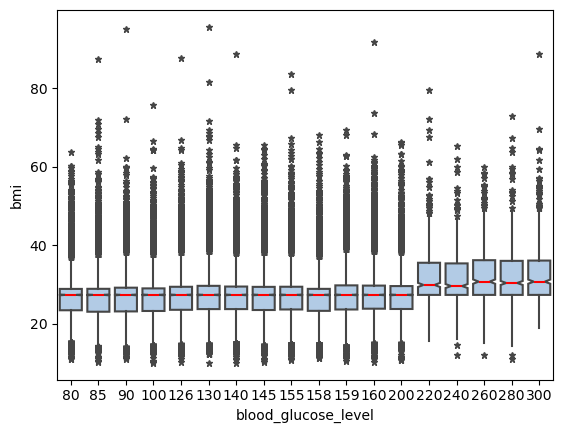

In [83]:
# Descriptive Statistics
# Imports libraries
from sklearn.preprocessing import LabelEncoder
# Distribution - Quartiles
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate
sns.boxplot(
    data = df, y="bmi", x="blood_glucose_level", 
    showcaps=False, notch = True,
    flierprops={"marker": "*"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "red"}, 
)


In [85]:
# The size of this dataset is to large, I will be randomly selecting 5000 from
# Those with diabtese and those without diabetes and placing this tailored data in a new dataframe


In [87]:
# Filters the dataframe and seperates people w/ diabetes and w/o diabetes
diabetic_data = df[df['diabetes'] == 1] 
non_diabetic_data = df[df['diabetes'] == 0]

# Samples 5000 random ppl from each group
diabetic_sample = diabetic_data.sample(n=5000, random_state=42)
non_diabetic_sample = non_diabetic_data.sample(n=5000, random_state=42)

# Concatenates the sampled dataframes
selected_data = pd.concat([diabetic_sample, non_diabetic_sample])

# Get the indices of selected ppl
selected_indices = selected_data.index

# Drop the ppl not selected based on there index
df3 = df.loc[selected_indices]

# Check the shape of final datafram
print("Final data shape:", df3.shape)

Final data shape: (10000, 9)


C:\Users\Thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='blood_glucose_level', ylabel='Count'>

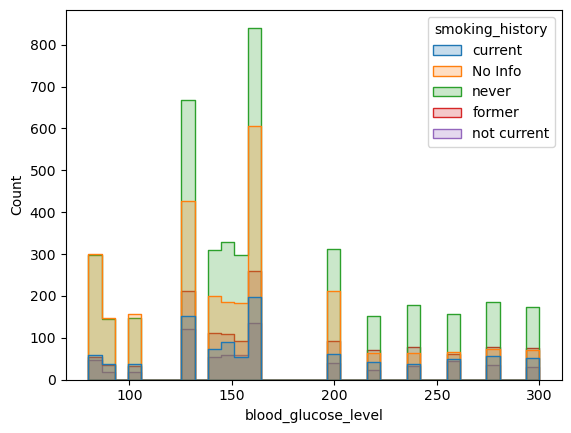

In [89]:
# Distribution - Frequency

sns.histplot(data = df3, x = 'blood_glucose_level', hue = 'smoking_history', element = 'step')

C:\Users\Thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='blood_glucose_level', ylabel='Count'>

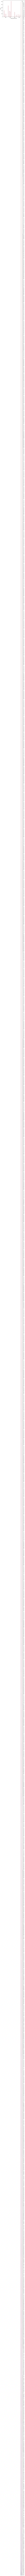

In [92]:
#Distribution - Frequency

sns.histplot(data = df3, x = 'blood_glucose_level', hue = 'bmi', element = 'step')b

In [94]:
df3.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
72615  Female  65.0             0              0         current  27.32   
79891  Female  56.0             0              0         No Info  27.32   
82642    Male  64.0             0              0         current  27.32   
63877  Female  79.0             1              0           never  30.51   
73374    Male  74.0             1              0          former  33.23   
...       ...   ...           ...            ...             ...    ...   
8232     Male  60.0             0              0           never  27.32   
25978  Female  37.0             0              0         No Info  25.22   
32486    Male  41.0             0              0         No Info  35.56   
29184  Female  26.0             0              0          former  35.05   
81878    Male   0.8             0              0         No Info  19.53   

       HbA1c_level  blood_glucose_level  diabetes  
72615          

In [98]:
# CENTRAL TENDENCY - Mean, Median, Mode
x = round(df3['bmi'].mean(), 1)
y = round(df3['bmi'].median(), 1)
z = round(df3['bmi'].mode(), 1)
print(f'The average bmi is {x}')
print(f'The median bmi is {y}')
print(f'The mode of bmi is {z}')

The average bmi is 29.5
The median bmi is 27.3
The mode of bmi is 0    27.3
Name: bmi, dtype: float64


In [100]:
# Descriptive stats at a glance
print(df3.describe())

                age  hypertension  heart_disease           bmi  HbA1c_level  \
count  10000.000000   10000.00000   10000.000000  10000.000000  10000.00000   
mean      50.645548       0.14870       0.086600     29.499905      6.17293   
std       21.280155       0.35581       0.281262      7.435249      1.29224   
min        0.080000       0.00000       0.000000     10.300000      3.50000   
25%       36.000000       0.00000       0.000000     25.920000      5.70000   
50%       54.000000       0.00000       0.000000     27.320000      6.10000   
75%       67.000000       0.00000       0.000000     32.822500      6.60000   
max       80.000000       1.00000       1.000000     88.720000      9.00000   

       blood_glucose_level      diabetes  
count         10000.000000  10000.000000  
mean            163.503900      0.500000  
std              56.970852      0.500025  
min              80.000000      0.000000  
25%             130.000000      0.000000  
50%             155.000000    

In [104]:
# Confirming there's no missing data that requires us to fill in for further calculations
df3.count(axis = 0)

gender                 10000
age                    10000
hypertension           10000
heart_disease          10000
smoking_history        10000
bmi                    10000
HbA1c_level            10000
blood_glucose_level    10000
diabetes               10000
dtype: int64

In [110]:
# Convert: Convert objects to category using Label Encoder for train and test/validation dataset
for dataset in df3:
    #gender set to binary
    df3["gender"].loc[df3["gender"] == "Male"] = 1
    df3["gender"].loc[df3["gender"] == "Female"] = 0
    df3["smoking_history"].loc[df3["smoking_history"] == "No Info"] = 0
    df3["smoking_history"].loc[df3["smoking_history"] == "current"] = 1
    df3["smoking_history"].loc[df3["smoking_history"] == "never"] = 2
    df3["smoking_history"].loc[df3["smoking_history"] == "former"] = 3    

df3.head()

C:\Users\Thoma\AppData\Local\Temp\ipykernel_16132\2752343537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["gender"].loc[df3["gender"] == "Male"] = 1
C:\Users\Thoma\AppData\Local\Temp\ipykernel_16132\2752343537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["gender"].loc[df3["gender"] == "Female"] = 0
C:\Users\Thoma\AppData\Local\Temp\ipykernel_16132\2752343537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
72615,0,65.0,0,0,1,27.32,7.5,145,1
79891,0,56.0,0,0,0,27.32,8.2,130,1
82642,1,64.0,0,0,1,27.32,8.8,160,1
63877,0,79.0,1,0,2,30.51,6.6,155,1
73374,1,74.0,1,0,3,33.23,5.7,280,1


In [112]:
# Import module function for power analysis
# Import module functionality

from statsmodels.stats.power import TTestIndPower
# Parameters for power analysis
alpha = .01
power = .9
effect = .9

In [114]:
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.1f' % result)

Sample Size: 38.4


In [116]:
# Perform power analysis with different effect size v1
effect = 0.5
alpha = 0.01
power = 0.9
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.1f' % result)

Sample Size: 120.7


In [ ]:
# Perform power analysis with different effect size v2
effect = 0.8
alpha = 0.01
power = 0.9
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.1f' % result)

In [118]:
# Perform power analysis with different values
effect = 0.5
alpha = 0.001
sample = 139.3
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=None, nobs1=sample, ratio=1.0, alpha=alpha)
print('Power: %.1f' % result)

Power: 0.8


In [120]:
# Perform power analysis with different values v2
effect = 0.5
power = 0.8
sample = 139.3
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=sample, ratio=1.0, alpha=None)
print('Alpha: %.3f' % result)

Alpha: 0.001


In [124]:
# Establish variables
mean = df3["blood_glucose_level"].mean()
sd = df3["blood_glucose_level"].std()

In [126]:
# Creates new column for blood glucose level z score
df3["blood_glucose_level_zscore"] = (df2["blood_glucose_level"] - mean) / sd
print(df3)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
72615      0  65.0             0              0               1  27.32   
79891      0  56.0             0              0               0  27.32   
82642      1  64.0             0              0               1  27.32   
63877      0  79.0             1              0               2  30.51   
73374      1  74.0             1              0               3  33.23   
...      ...   ...           ...            ...             ...    ...   
8232       1  60.0             0              0               2  27.32   
25978      0  37.0             0              0               0  25.22   
32486      1  41.0             0              0               0  35.56   
29184      0  26.0             0              0               3  35.05   
81878      1   0.8             0              0               0  19.53   

       HbA1c_level  blood_glucose_level  diabetes  blood_glucose_level_zscore  
72615          7.5             

In [128]:
# Creates a new column for bmi zscore
df3["bmi_zscore"] = (df3["bmi"] - mean) / sd
print(df3)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
72615      0  65.0             0              0               1  27.32   
79891      0  56.0             0              0               0  27.32   
82642      1  64.0             0              0               1  27.32   
63877      0  79.0             1              0               2  30.51   
73374      1  74.0             1              0               3  33.23   
...      ...   ...           ...            ...             ...    ...   
8232       1  60.0             0              0               2  27.32   
25978      0  37.0             0              0               0  25.22   
32486      1  41.0             0              0               0  35.56   
29184      0  26.0             0              0               3  35.05   
81878      1   0.8             0              0               0  19.53   

       HbA1c_level  blood_glucose_level  diabetes  blood_glucose_level_zscore  \
72615          7.5            

In [130]:
# Imports Packages
from scipy import stats

In [132]:
# Running a one-sample t-test
one_t_test = stats.ttest_1samp(df2["bmi"], popmean = 11)
one_t_test

TtestResult(statistic=777.6477542972912, pvalue=0.0, df=99999)

In [138]:
# Running an independent samples t-test
# Female and Male attributes were previously converted to 0 & 1, respectively 
ind_t_test = stats.ttest_ind(df3.bmi[df3.gender == 0],df3.bmi[df3.gender == 1])
ind_t_test

TtestResult(statistic=3.214044888256851, pvalue=0.0013129468724589642, df=9997.0)

In [144]:
# Running an independent samples t-test
# Female and Male attributes were previously converted to 0 & 1, respectively 
ind_t_test = stats.ttest_ind(df3.blood_glucose_level[df3.gender == 0],df3.blood_glucose_level[df3.gender == 1])
ind_t_test

TtestResult(statistic=-4.727753476218634, pvalue=2.3011998598531596e-06, df=9997.0)

In [146]:
# Running paired t-test
paired_t_test = stats.ttest_rel(df2['bmi'], df2['blood_glucose_level'])
paired_t_test

TtestResult(statistic=-861.5961592181347, pvalue=0.0, df=99999)

In [148]:
# Import packages for ANOVA Tests
import scipy.stats as stats 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm

In [152]:
# Using original dataframe "df"
df['smoking_history'].value_counts()

smoking_history
never          39099
No Info        35816
former          9352
current         9286
not current     6447
Name: count, dtype: int64

In [154]:
df['HbA1c_level'].value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [156]:
data = {
    'smoking_history':
    ['never', 'former', 'current', 'not current'],
    'HbA1c_level': [6.6, 3.5, 4.8, 9.0,]
}

df = pd.read_csv("diabetes_prediction_dataset.csv") 

# Perform one-way ANOVA with C-Categorical factor of smoking_history
model = ols('HbA1c_level ~ C(smoking_history)', data=df3).fit()
anova_results = anova_lm(model)

print("ANOVA Results:")
print(anova_results)

ANOVA Results:
                         df         sum_sq    mean_sq          F        PR(>F)
C(smoking_history)      5.0     333.172691  66.634538  58.294663  8.389575e-61
Residual            99994.0  114299.553804   1.143064        NaN           NaN


In [ ]:
# These results indicate that smoking_history has a significant impact on HbA1c levels that contirubute to diabetes